## Happy $\pi$ Day
Since we will not see you on Mar 14 ($\pi$ Day), here is a bonus episode for the HSPP Class *Computing in the Small*.  We wanted to demonstrate computing Pi using Python and using a method that did not use calculus or trigonometry.  The following construction uses a technique similar to that used by Archimedes in 200 BCE and is based on the following video that you are encouraged to watch!

[Finding Pi by Archimedes' Method](https://www.youtube.com/watch?v=_rJdkhlWZVQ)

We will implement in Python a method the author of the video implements using a spreadsheet.  The basic idea is to inscribe polygons with more and momre sides into a circle of radius 1 (which has circumference $2 \pi$).  The idea is that the more sides in the polygon, the closer the approximation.  Archimedes used a method that used an inscribed polygon on the inside which gave a perimeter that was too small and a circumscribed polygon on the outside which gave a number that was too big.  In this video the author is only concerned with the lower bound provided by th einside polygon, and we will stick with that.

Of course Python already has a built-in value for pi accessible using the "math" package.  Please note that we use this package elsewhere and so be sure to evaluate this cell first (the "run all" function in the notebook is helpful in this regard).

In [8]:
import math

print(math.pi)

3.141592653589793


We can use this value to gauge the accuracy of our approximation.  Note that `math.pi` uses floating point aritmetic which has limited precision.  To get more digits I consulted, [Wolfram Alpha](https://www.wolframalpha.com/) shows that $\pi$ to 50 decimmal places is:
$$
3.1415926535897932384626433832795028841971693993751
$$
The exact query used was "pi to 50 decimal places"

The method in the video starts with a hexagon inscribed (drawn inside of) a circle.  The circle has circumference $2 \pi$ and the hexagon has perimeter $6$.  At each step we want to double the number of sides in our polygon and find the perimeter of a 12-gon, 24-gon etc.  The video explains how to compute the side of the next larger polygon from the one we have by breaking a side into two.  Because it is $pi$ day, we also display the value of half he perimeter which is $\pi$.

* $N$ = number of sides
* $S_1$ = side length (note that $N S = P$ where $P$ is the perimeter)
* $a$ = $\sqrt{1 - (\frac{S_1}{2})^2}$ altitude of the isoceles triangle whose sides are 1, 1, S
* $b = 1 - a$
* $S_2 = \sqrt{(\frac{S_1}{2})^2 + b^2}$ where $S_2$ represents the length of the side of a polygon with $2N$ sides

Here is a diagram from a frame in the video showing the construction:

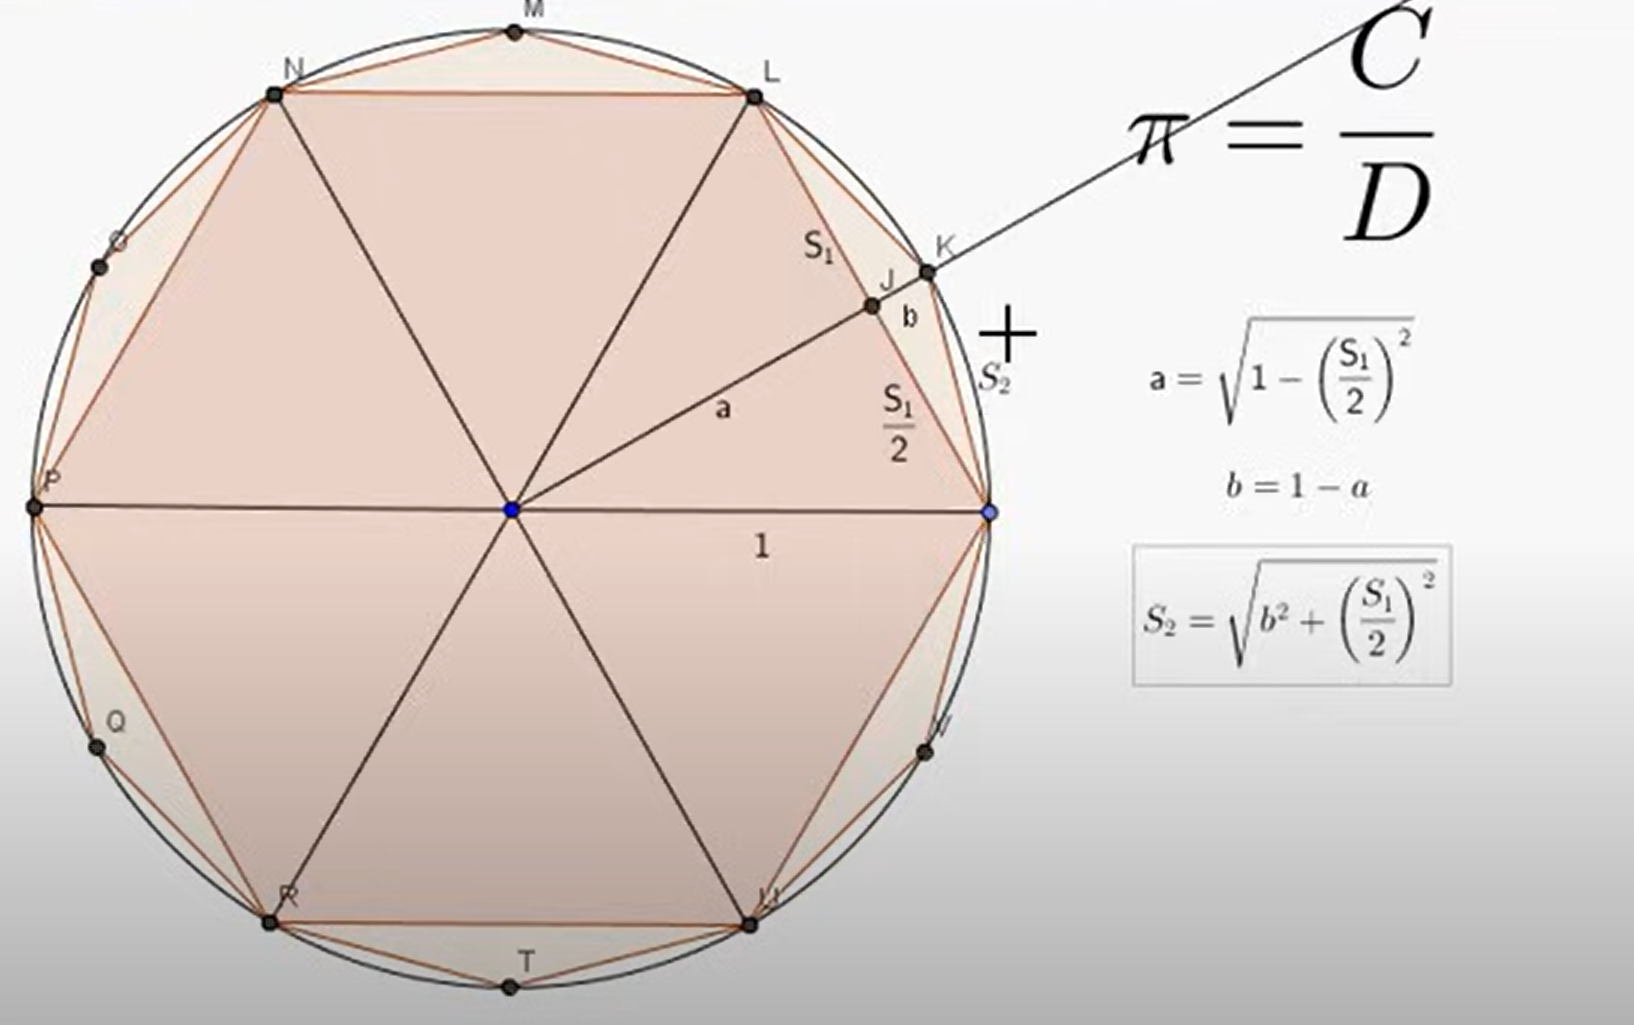

In [9]:
def new_side(s):
    a = math.sqrt(1 - (s/2)**2)
    b = 1 - a
    return math.sqrt(b**2 + (s/2)**2)

### Python Note
The following cell uses some formatting in Python called *f-strings* which allow one to format numbers before they are printed.  The string is preceded by the letter `f` and numbers to be inserted are in set braces.  What comes after the `:` gives th edesired format.  For example `1.15f` says we want a floating point (decimal) number with two digits (padded with spaces) to the left of the decimal and 15 places to the right.

Because Python has other uses for commas, we cannot write a million, for example as `1,000,000` but to make up for this fact Python, and some otrhher languages, let us use an underscore `_` and therefore to write a million as `1_000_000`.  We use this to specify that we want the number of sides in a column of width 12 with `_` inserted in groups of three digits to make it readable.

In [10]:
def compute_pi(steps):
    print("Sides           Perimeter (2 pi)        Perimeter/2 (pi)")
    num_sides = 6
    side_length = 1.0
    for i in range(steps):
        perimeter = num_sides * side_length
        print(f"{num_sides:12_}\t{perimeter:2.15f}\t{perimeter/2.0:2.15f}")
        num_sides *= 2
        side_length = new_side(side_length)

Eventually we run into the limitations of Python's floating point accuracy using the `math.sqrt` function, therefore the exact stopping place and number of sigits shown was determined by trial and error to make sure that the approximation was accurate!

In [11]:
compute_pi(25)

Sides           Perimeter (2 pi)        Perimeter/2 (pi)
           6	6.000000000000000	3.000000000000000
          12	6.211657082460498	3.105828541230249
          24	6.265257226562476	3.132628613281238
          48	6.278700406093733	3.139350203046867
          96	6.282063901781020	3.141031950890510
         192	6.282904944570925	3.141452472285462
         384	6.283115215823716	3.141557607911858
         768	6.283167784296637	3.141583892148319
       1_536	6.283180926456101	3.141590463228050
       3_072	6.283184211998543	3.141592105999272
       6_144	6.283185033384315	3.141592516692158
      12_288	6.283185238730768	3.141592619365384
      24_576	6.283185290067382	3.141592645033691
      49_152	6.283185302901536	3.141592651450768
      98_304	6.283185306110075	3.141592653055037
     196_608	6.283185306912209	3.141592653456105
     393_216	6.283185307112744	3.141592653556372
     786_432	6.283185307162876	3.141592653581438
   1_572_864	6.283185307175409	3.141592653587705
   3_145_728

Happy $\pi$ day!

### Footnote
It occurred to us that the construction here used the square root and therefore we were forced to resort to floating point numbers, whereas if we stayed with fractions we could rely on Python's ability to hold high precisions.  We were hoping to find a good way to make the above program stick to rational numbers but there is not a simple way to do so (some "non-simple" methods would involve, fopr example, employingh Newton's method for approximating square roots).

However, to leave on a high note, some of you might have seen the approcmation $\frac{22}{7}$ for $\pi$ but an even better one not hard to memorize is $\frac{355}{113}$.

In [12]:
print(math.pi)
print(22/7)
print(355/113)

3.141592653589793
3.142857142857143
3.1415929203539825
